In [42]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd

In [ ]:
df = pd.read_csv('pages.csv')
data = df.to_numpy().transpose()
for i in range(len(data[3])):
    data[3][i] = float(data[3][i].replace('%', '')) 


# print(data[2]) impresion
# print(data[1]) clicks
# print(data[3]) CTR
# print(data[4]) service
# print(data[5]) catagory


In [100]:
# important variables
service_impression_average = [0 for i in range(6)]
service_clicks_average = [0 for i in range(6)]
service_news_counter = [0 for i in range(6)]
services_code = [1, 2, 3, 4, 5, 6]

# service impression average calculate
for i in range(len(data[2])):
    service_impression_average[data[4][i] - 1] += data[2][i]
    service_news_counter[data[4][i] - 1] += 1
for i in range(len(service_impression_average)):
    service_impression_average[i] /= service_news_counter[i] if service_news_counter[i] != 0 else 1

# service click impression average calculate
for i in range(len(data[1])):
    service_clicks_average[data[4][i] - 1] += data[1][i]
for i in range(len(service_clicks_average)):
    service_clicks_average[i] /= service_news_counter[i] if service_news_counter[i] != 0 else 1


print("services impression average: ", service_impression_average)
print("services clicks average: " , service_clicks_average)
print("servies news counter: ", service_news_counter)


    

services impression average:  [137923.61311053985, 163691.50757575757, 168686.83333333334, 178370.31578947368, 0.0, 79962.52173913043]
services clicks average:  [15952.052699228792, 20147.310606060608, 10546.0, 20206.526315789473, 0.0, 7554.934782608696]
servies news counter:  [778, 132, 6, 38, 0, 46]


<BarContainer object of 6 artists>

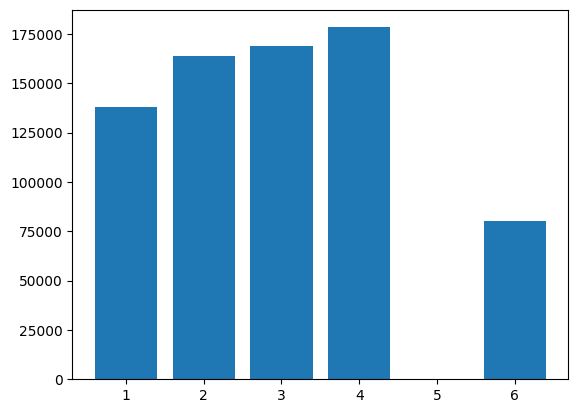

In [101]:
plt.bar(services_code, service_impression_average)

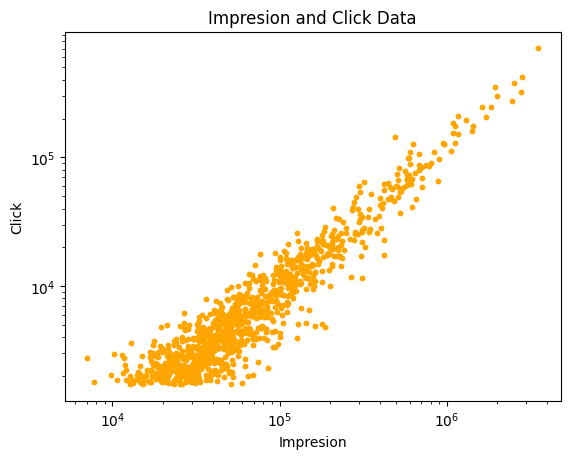

In [76]:
x = data[2]
y = data[1]
colors = data[3]
plt.xscale("log")
plt.yscale("log")
plt.scatter(x, y, c='orange', s = 10)
plt.title("Impresion and Click Data")
plt.xlabel("Impresion")
plt.ylabel("Click")
plt.show()

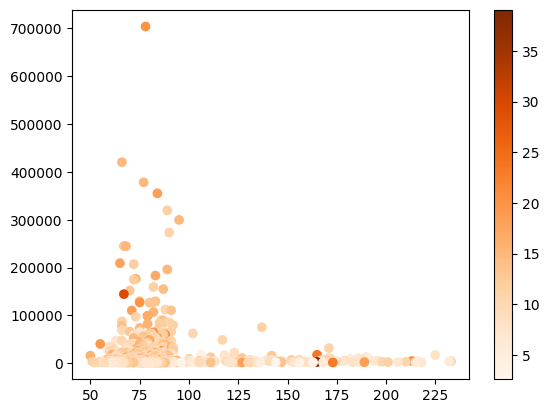

In [54]:

x = []
for i in data[0]:
    x.append(len(i))

y = data[1]
colors = data[3]
plt.scatter(x, y, c=colors, cmap='Oranges')
plt.colorbar()
plt.show()